<a href="https://colab.research.google.com/github/pawan-cpu/Learn-Python-with-Pawan-Kumar/blob/main/60Pro22Jan_Pawan_whitehatAIFC_Project_60_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Multiple linear regression - Introduction
 2. Car Prediction - Feature Encoding
 
 
 

---

#### Getting Started:

1. Click on this link to open the Colab file for this project.

  https://colab.research.google.com/drive/1Q4ibtK56sd9ayppuKzgJkjjJ1HTz6pqt

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project69** format.

4. Now, write your code in the prescribed code cells.


---

### Problem Statement

Implement multiple linear regression to create a predictive model capable of predicting the price of diamonds on the basis of various factors such as its cut, color, clarity, depth etc. 

---

### List of Activities
 
**Activity 1:** Analysing the Dataset

**Activity 2:** Data Preparation

**Activity 3:** Feature Encoding

**Activity 4:** Train-Test Split
 
**Activity 5:** Model Training using `statsmodels.api`



 


---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **Diamonds** dataset using the below link. This dataset consists of following columns:

|Field|Description|
|---:|:---|
|carat|weight of the diamond|
|cut|quality of the cut|
|color|diamond colour, from J (worst) to D (best)|
|clarity|a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|depth|total depth percentage = z / mean(x, y) = 2 * z / (x + y)|
|table|The width of the diamond's table expressed as a percentage of its average diameter|
|price|price in US dollars|
|x|length in mm|
|y|width in mm|
|z|depth in mm|


  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/diamonds.csv

- Print the first five rows of the dataset. Check for null values and treat them accordingly.

- Remove the unnecessary column `Unnamed: 0` as it is of no use.



In [24]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df=pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/diamonds.csv')
df
# Print first five rows using head() function
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [26]:
# Print the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [27]:
# Drop 'Unnamed: 0' column
df.drop('Unnamed: 0',axis=1,inplace=True)

---

#### Activity 2: Data Preparation

Extract numerical attributes from the dataset and create a heatmap to identify correlation among various numerical attributes.

In [28]:
# Extract all the numeric (float and int type) columns from the dataset.
numeric_df = df.select_dtypes(include = ['int64', 'float64'])
numeric_df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


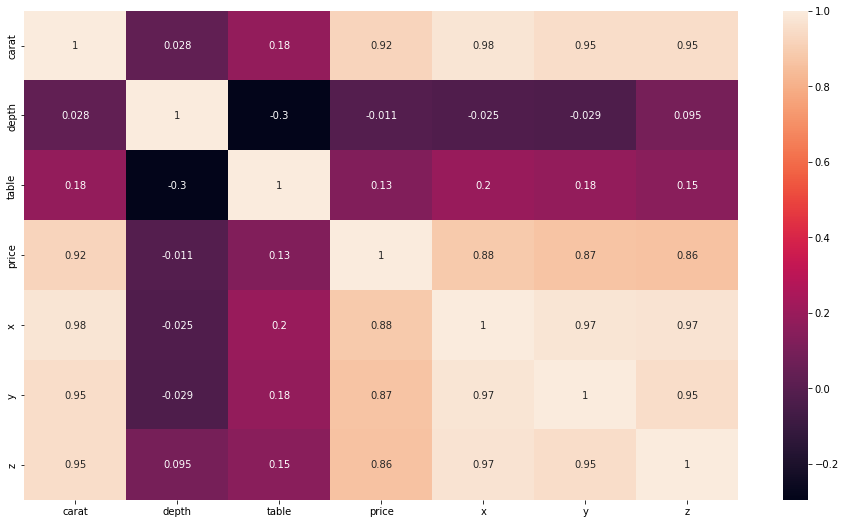

In [29]:
# Draw a correlation heatmap between the numeric features.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Q:** Which features are highly correlated with `price`?

**A:** 

**Q:** Is there multicollinearity in the dataset?

**A:** 



---

#### Activity 3: Feature Encoding

The dataset contains certain columns that are categorical. However for linear regression, we need all numerical variables. Perform **one-hot encoding** to obtain numeric values from non-numeric categorical values. 


In [30]:
# Create a new dataframe having dummy variables for all the categorical type columns of the dataset using 'get_dummies()' function.
cut_dummies=pd.get_dummies(df['cut'],dtype=int)
cut_dummies.head()

,Fair,Good,Ideal,Premium,Very Good
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [31]:
color_dummies=pd.get_dummies(df['color'],dtype=int)
color_dummies.head()

,D,E,F,G,H,I,J
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [32]:
clarity_dummies=pd.get_dummies(df['clarity'],dtype=int)
clarity_dummies.head()

,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0


In [33]:
# Print the information of the new dataframe obtained after one-hot encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [34]:
features = list(df.columns.values)
features.remove('price')
features

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

----

#### Activity 4: Train-Test Split

We need to predict the value of `price` variable, using other variables. Thus, `price` is the target or dependent variable and other columns except `price` are the features or the independent variables.

Split the dataset into training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set and keep the `price` as the target variables.

In [35]:
# Split the 'df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df[features]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

---

#### Activity 5: Model Training using `statsmodels.api`

Now build a multiple linear regression model using the `statsmodels.api` module.
Also, print the summary of the linear regression model built.

In [ ]:
#  Build a linear regression model using all the features to predict insurance charges.
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train, X_train_sm).fit()
lin_reg.params


In [ ]:
# Print the summary of the linear regression report.
print(lin_reg.summary())




**Q:** What is the Adjusted $R^2$ value?

**A:**




---

### Submitting the Project:

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project69**) of the notebook will get copied 

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project69** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800> 

---